In [1]:
# imports

import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import random
from pricer.items import Item
from pricer.parser import parse
load_dotenv(override=True)

True

In [2]:
# Log in to HuggingFace - if you get a "Note" about Environment variable being set, ignore it

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Appliances", split="full", trust_remote_code=True)

README.md: 0.00B [00:00, ?B/s]

c:\Users\rambo\projects\ED\llm_engineering\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rambo\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [4]:
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 94,327


In [5]:
dataset[6]

{'main_category': 'Appliances',
 'title': 'WD12X10327 Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces AP4980629 PS3486910 1811003',
 'average_rating': 4.6,
 'rating_number': 323,
 'features': ['【PARTS NUMBER】The WD12X10327 dishwasher top rack wheels and stud assembly Kit （4 pcs）',
  '【SCOPE OF APPLICATION】The dishwasher works with most top name brands,If you are not sure if part is correct, ask us in Customer questions & answers section or visiting the AMI PARTS storefront.We’re happy to help ensure you select the correct part for your Rack Roller and stud',
  '【REPLACES PART】1811003, AP4980629, WD12X0330, WD12X0356, WD12X0357, WD12X0383, WD12X0385, WD12X10327, WD12X330, WD12X356, WD12X357, WD12X383, WD12X385',
  '【FIXES SYMPTOMS】Door won’t close | Not cleaning dishes properly | Noisy | Door latch failure',
  '【QUALITY WARRANTY】The replacement part is made from durable high quality material and well-tested by manufacturer.For any reason you’re not satisfied,you can ask

In [11]:
max_price = 0
max_item = None
for datapoint in tqdm(dataset):
    try:
        price = float(datapoint["price"])
        if price > max_price:
            max_item = datapoint
            max_price = price
    except ValueError:
        pass
print(f"Appliances dataset with max_item is {max_item} and the price {max_price}")


  0%|          | 0/94327 [00:00<?, ?it/s]

Appliances dataset with max_item is {'main_category': 'Appliances', 'title': 'TurboChef BULLET Rapid Cook Electric Microwave Convection Oven', 'average_rating': 1.0, 'rating_number': 1, 'features': [], 'description': [], 'price': '21095.62', 'images': {'hi_res': ['https://m.media-amazon.com/images/I/61oZOVndavL._AC_SL1000_.jpg'], 'large': ['https://m.media-amazon.com/images/I/41rIxEeZKjL._AC_.jpg'], 'thumb': ['https://m.media-amazon.com/images/I/41rIxEeZKjL._AC_SR38,50_.jpg'], 'variant': ['MAIN']}, 'videos': {'title': [], 'url': [], 'user_id': []}, 'store': 'TurboChef', 'categories': [], 'details': '{"Brand Name": "TurboChef", "Energy Use": "800 Watts", "Installation Type": "Over-the-Range", "Special Features": "Timer", "Date First Available": "November 2, 2016"}', 'parent_asin': 'B01D05UB8M', 'bought_together': None, 'subtitle': None, 'author': None} and the price 21095.62


In [13]:
items = [parse(datapoint,"Appliances") for datapoint in tqdm(dataset)]
items = [item for item in items if item is not None]

print(f"lenght of the items are {len(items)} and lenght of the dataset is {len(dataset)}")

  0%|          | 0/94327 [00:00<?, ?it/s]

lenght of the items are 35307 and lenght of the dataset is 94327


In [15]:
items[0].full

'Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces   1811003\n[\'【PARTS NUMBER】The  dishwasher top rack wheels and stud assembly Kit （4 pcs）\', \'【SCOPE OF 】The dishwasher works with most top name brands,If you are not sure if part is correct, ask us in Customer questions & answers section or visiting the AMI PARTS storefront.We’re happy to help ensure you select the correct part for your Rack Roller and stud\', \'【 PART】, , , , , , , , , , , , \', \'【FIXES SYMPTOMS】Door won’t close | Not cleaning dishes properly | Noisy | Door latch failure\', \'【QUALITY WARRANTY】The replacement part is made from durable high quality material and well-tested by manufacturer.For any reason you’re not satisfied,you can ask for a replacement or full refund\']\n{"Brand Name": "AMI PARTS", "Model Info": "", "Item Weight": "0.634 ounces", "Color": "White", "Material Type": "Plastic", "Date First Available": "July 14, 2019", "Brand": "AMI PARTS", "Material": "Plastic", "Model Name": " Rack Rol

In [20]:
prices = [item.price for item in items]
lengths= [len(item.full) for item in items]
print(prices)
print(lengths)

[8.99, 16.52, 8.89, 38.99, 34.99, 7.95, 138.0, 36.95, 17.68, 64.5, 29.99, 31.94, 6.95, 13.04, 28.99, 8.99, 7.99, 139.99, 206.0, 29.99, 19.99, 23.37, 15.53, 102.4, 24.99, 71.68, 13.49, 9.95, 30.99, 69.93, 42.89, 22.99, 16.88, 4.99, 9.59, 17.15, 10.57, 24.98, 7.99, 11.59, 22.99, 6.99, 21.99, 19.99, 9.59, 22.99, 12.99, 76.99, 16.99, 28.95, 16.99, 58.71, 159.99, 18.83, 9.99, 11.99, 38.86, 7.53, 13.95, 399.99, 47.99, 85.02, 65.02, 89.99, 25.0, 18.55, 36.25, 22.98, 12.97, 12.99, 77.54, 134.44, 19.99, 39.0, 45.09, 59.99, 34.99, 27.99, 9.5, 149.99, 12.99, 15.99, 21.99, 31.99, 39.99, 26.95, 45.0, 17.59, 17.63, 11.91, 25.99, 32.2, 59.99, 18.99, 5.99, 12.99, 249.99, 7.99, 25.99, 28.5, 49.99, 56.38, 25.39, 18.77, 21.24, 15.86, 26.17, 18.99, 41.33, 10.99, 7.77, 21.99, 17.91, 118.35, 22.97, 59.99, 71.2, 68.95, 8.99, 35.99, 80.56, 131.95, 22.0, 41.5, 31.91, 7.97, 16.95, 29.99, 17.99, 17.04, 24.99, 12.99, 331.0, 26.99, 19.99, 12.99, 101.89, 105.81, 26.99, 19.99, 29.99, 27.99, 39.95, 14.99, 86.49, 69.7

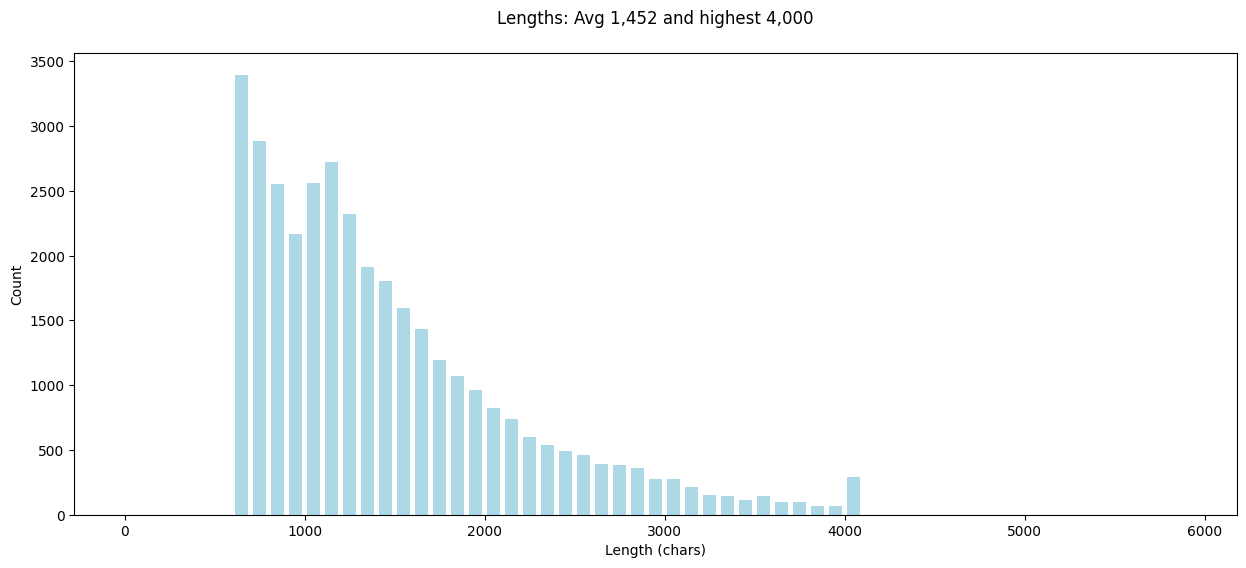

In [18]:
# Plot the distribution of lengths

plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

In [21]:
max_length = max(lengths)
max_length_item = items[lengths.index(max_length)]
print(max_length_item.full)


Polyester Dryer Vent Filters Replacement Part by Beaquicy Replacement for Better vent Indoor Dryer Vent Packs of 12
['✅【 AIR 】--- The polyester filters provide optimal air conditioning for your dryer and keep it away from polluted air. Because these parts will rate to trap fine lint and dust particles, protect your home from unwanted bacteria and other unfriendly dust particles and can be vacuumed clean or replaced when fully loaded with lint. so that the air in your room is cleaner than ever. While protecting your indoor quality, clothes can dry faster. It helps improve the indoor air quality.', '✅【HIGH-GRADE 】--- The package includes 12 x replacement polyester filters for bettervent.They are well-made from durable and high-grade polyester which can traps fine lint and dust particles, optimize the cleaning process and prolong lifetime. Each filter protects up to 5 dryer loads! For best results insert blue side facing towards dryer vent.', '✅【WIDE 】--- These polyester filters are desig

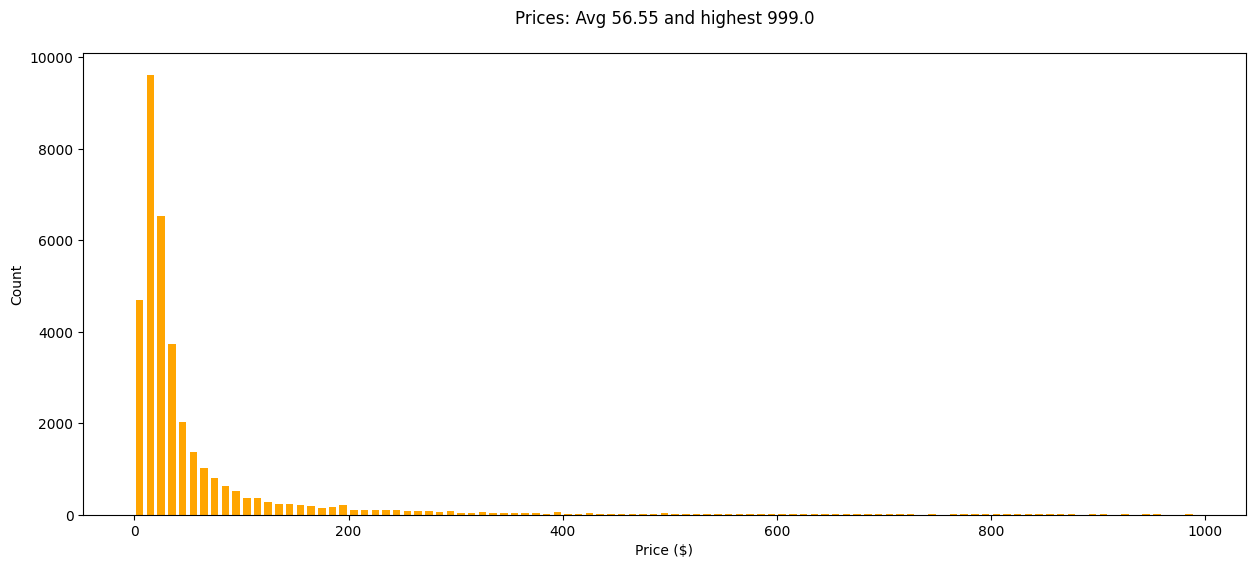

In [22]:
# Plot the distribution of prices
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [24]:
print(items[3].full)

MLGB Stainless Steel Brushed Pattern Dishwasher Magnet Cover Panel Decal Home Appliance Art, Stainless Steel Fridge Door Cover Decals Magnetic, Black, Mobile Magnetic 23" x 26"
['Stainless Steel Brushed Pattern Magnetic Dishwasher Panel Covers allow you to easily transform your kitchen as the seasons change. You can instantly get rid of outdated and/or mismatched appliances, will give your kitchen a refreshing look.', ':', 'Vinyl + rubber magnet', 'Occasion:', 'Magnet Dishwasher Cover Decor dishwasher covers and any metal device surface with magnetism.', '【Kitchen Dishwasher Covers SIZE】S - 23 W x 17 H inches; 58.5 W x 43 H cm;L - 23 W x 26 H inches; 58.5 W x 66 H cm;', 'Attention:', 'Just ensure that your dishwasher is magnetic before ordering the dishwasher cover magnet', 'Due to the inconsistent calibration of the monitor, the colors on the computer monitor may be slightly different.', 'Quality service:', 'If you have any questions or questions, please feel free to contact us and we

In [25]:
from pricer.loaders import ItemLoader
loader = ItemLoader("Appliances")
items = loader.load()


Loading dataset Appliances


100%|██████████| 95/95 [00:17<00:00,  5.49it/s]


Completed Appliances with 35,307 datapoints in 0.3 mins


In [26]:

dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]

In [ ]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())
print(f"A grand total of {len(items):,} items")

Loading dataset Automotive


Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 2004/2004 [28:27<00:00,  1.17it/s]


Completed Automotive with 974,469 datapoints in 35.6 mins
Loading dataset Electronics


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


meta_Electronics.jsonl:   0%|          | 0.00/5.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

 80%|███████▉  | 1288/1611 [20:26<05:07,  1.05it/s]
